LGMVIP-DataScience Internship - January 2022

Intermediate level 

TASK-2 Prediction using Decision Tree  Algorithm

Done By LAKSHMAN K.R 

dataset link : https://bit.ly/3kXTdox

dataset used here : Iris.csv

Importing the Libraries

---



In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Loading the Iris Dataset


---



In [ ]:
iris = load_iris()

Summarize the Dataset


---



In [ ]:
print(iris.data)
print(iris.target)
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Segregate Dataset 

---



In [ ]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Splitting datatset into Train & Test

---



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


Finding the Best Max_depth Value

Text(0, 0.5, 'score')

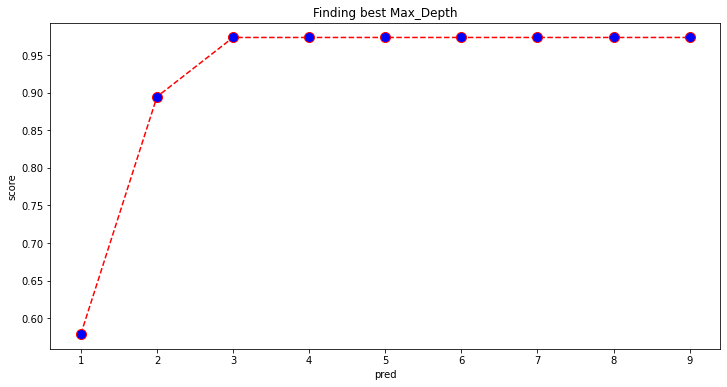

In [ ]:
accuracy = []

for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth = i, random_state = 0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    accuracy.append(score)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')    

Training 

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Prediction 


---



In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]]


Accuracy Score

---



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 97.36842105263158%


New Case Prediction : Random Value 


---






In [ ]:
sepal_length = float(input("Enter Sepal length in cms : "))
sepal_width = float(input("Enter Sepal width in cms : "))
petal_length = float(input("Enter Petal length in cms : "))
petal_width = float(input("Enter Petal width in cms : "))


Enter Sepal length in cms : 4
Enter Sepal width in cms : 3
Enter Petal length in cms : 3
Enter Petal width in cms : 4


In [ ]:
new_case = pd.DataFrame({"sepal length (cm)":[sepal_length] ,"sepal width (cm)" :[sepal_width] , "petal length (cm)" :[petal_length] , "petal width (cm)": [petal_width]})
type (new_case)


pandas.core.frame.DataFrame

In [ ]:
result = model.predict(new_case)
print ( result )

[2]


Soo , It has predicted the Result to be Class 2 for the given Feature values

Visualization

---



In [ ]:
iris = pd.read_csv('Iris.csv')

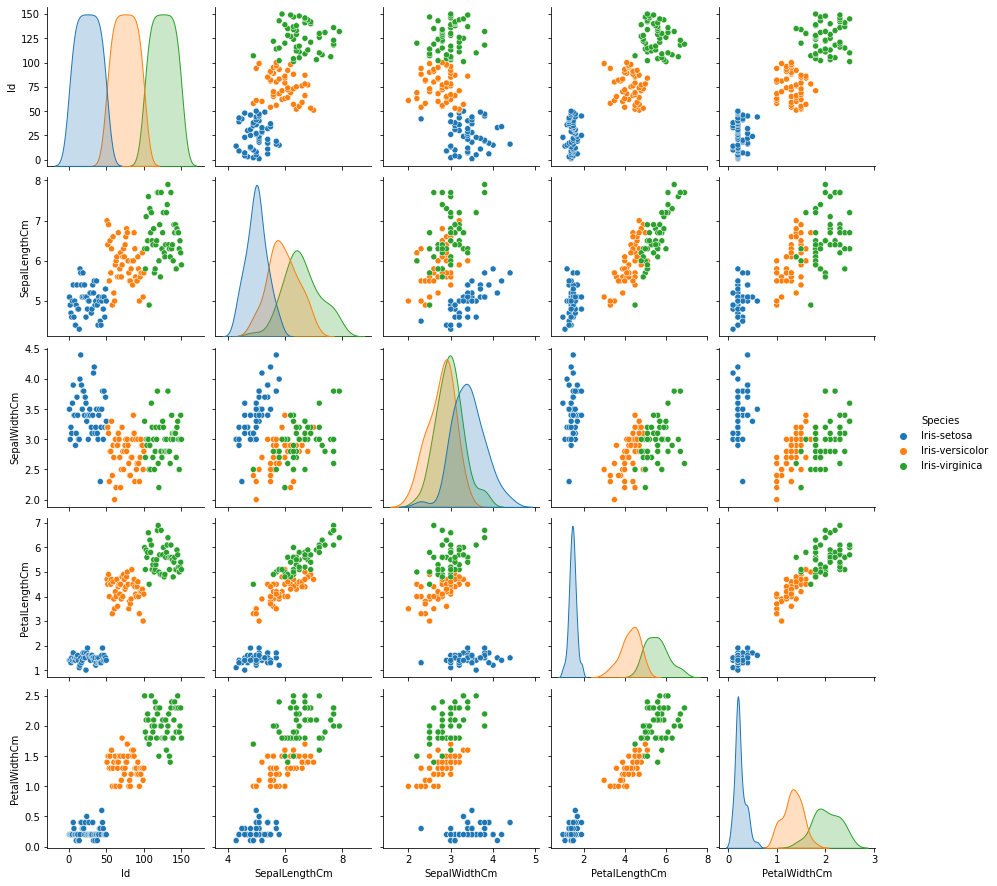

In [ ]:
import seaborn as sns
sns.pairplot(data=iris, hue='Species')
plt.show()

[Text(0.375, 0.875, 'PetalLengthCm <= 0.8\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.625, 'SepalWidthCm <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-virginica'),
 Text(0.25, 0.375, 'PetalLengthCm <= 1.65\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.75, 0.375, 'SepalWidthCm <= 5.05\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]\nclass = Iris-virginica'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = Iris-virginica')]

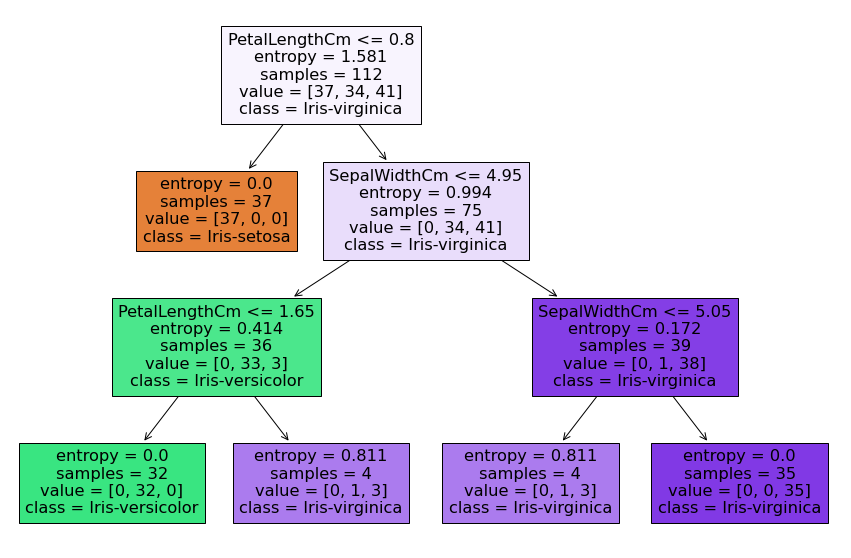

In [ ]:
col = iris.columns[:-1]
classes = iris['Species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=col, class_names=classes,  filled=True)

Then we have visualized the Decision Tree Classification